In [133]:
import numpy as np
import pandas as pd
from wombat.models import dbsession, engine
from wombat.models import Item, RentalItem, Rental
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.style.use('ggplot')
mpl.rcParams['figure.figsize'] = (20, 10)
mpl.rcParams['lines.linewidth'] = 2


# res = find_by_item_type("dresses")
query = """SELECT I.id, I.brand, I.item_type, I.cost, I.sku,
    I.rent_per_week, I.created_at, I.title, I.description,
    I.year_purchased, R.rental_date, R.return_date,
    RI.item_price, RI.refunded, RI.fit_return
    FROM items I
    LEFT JOIN rental_items RI ON I.id = RI.item_id
    LEFT JOIN rentals R ON R.id = RI.rental_id;"""
df = pd.read_sql_query(query, engine)
df


,id,brand,item_type,cost,sku,rent_per_week,created_at,title,description,year_purchased,rental_date,return_date,item_price,refunded,fit_return
0,7832,Jill Jill Stuart,dresses,458.00,None,56.0,2017-03-28 19:30:50.390866,Women's Green Floral Gown,Talk about the perfect summer gown!,2016,NaT,NaT,56.0,False,False
1,7285,Halston Heritage,dresses,445.00,None,60.0,2016-12-15 21:27:49.615041,Take A Look At Me Now Dress,For a look that is simple yet sexy go for this...,None,NaT,NaT,60.0,False,False
2,6237,Chanel,bags,4900.00,None,140.0,2016-07-07 02:38:06.723585,Taupe Quilted Crossbody,Limited edition taupe Chanel with chrome hardw...,2015,NaT,NaT,140.0,False,False
3,7830,Rosantica,accessories,225.00,None,30.0,2017-03-28 19:24:37.709684,Cancun Pom Pom Earrings,Join the statement earring trend with these st...,2016,NaT,NaT,30.0,False,False
4,6234,BCBGMAXAZRIA,dresses,450.00,None,45.0,2016-07-07 02:29:51.919396,Multi-color pleaded dress,"This coral, beige, black and sheer dress would...",2015,NaT,NaT,45.0,False,False
5,1915,Adrianna Papell,dresses,260.00,10821076,44.0,2015-06-26 19:33:50.224573,Beaded Blouson,Adrianna Papell chiffon gown with art-deco ins...,None,NaT,NaT,44.0,False,False
6,6234,BCBGMAXAZRIA,dresses,450.00,None,45.0,2016-07-07 02:29:51.919396,Multi-color pleaded dress,"This coral, beige, black and sheer dress would...",2015,NaT,NaT,45.0,True,False
7,1915,Adrianna Papell,dresses,260.00,10821076,44.0,2015-06-26 19:33:50.224573,Beaded Blouson,Adrianna Papell chiffon gown with art-deco ins...,None,NaT,NaT,44.0,True,False
8,7655,Lovers + Friends,dresses,180.00,None,40.0,2017-02-15 19:57:15.850180,Lana Dress,Neckline keyhole with metal bar accent and bac...,None,NaT,NaT,40.0,False,False
9,7239,Reformation,dresses,228.00,None,40.0,2016-12-06 19:08:07.732880,Cold Shoulder Floral Dress,Clothes that will actually make you want to go...,None,NaT,NaT,40.0,False,False


In [27]:
brand_query = "SELECT item_type, count(item_type) FROM items GROUP BY item_type ORDER BY count(item_type) DESC;"
brand_df = pd.read_sql_query(brand_query, engine)
brand_df

,item_type,count
0,dresses,5089
1,shoes,254
2,bottoms,254
3,accessories,240
4,tops,196
5,outerwear,120
6,bags,89
7,skirts,10
8,shirts,6
9,pants,6


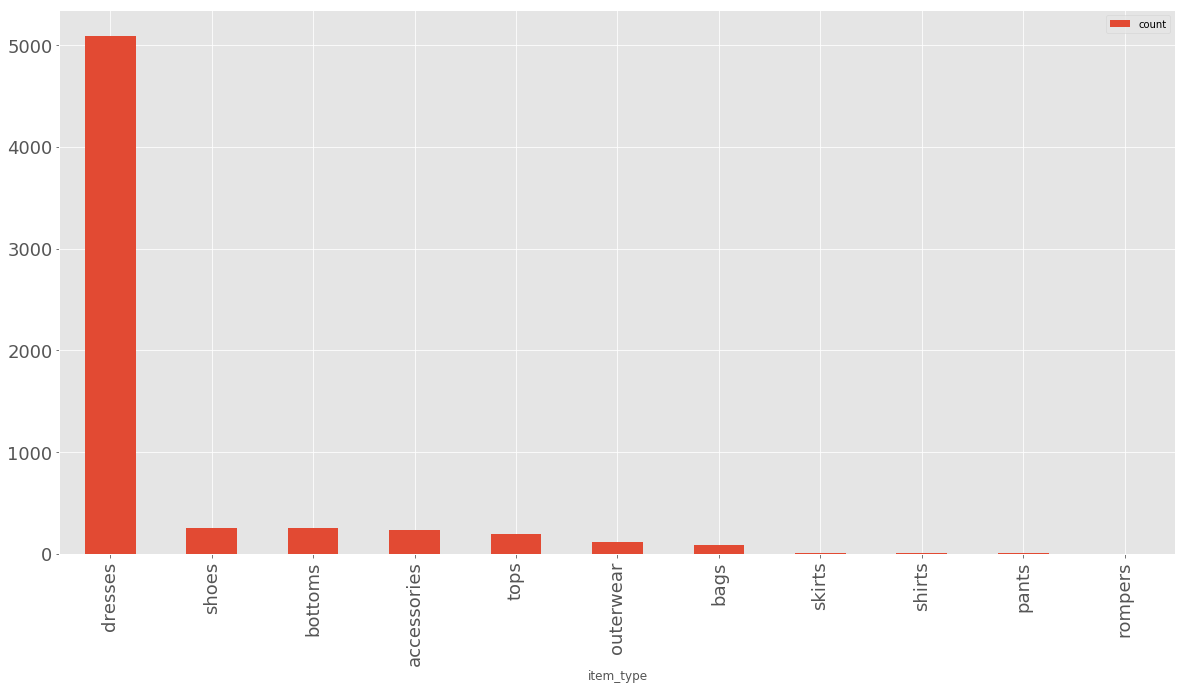

In [28]:
brand_df.plot(kind='bar', x='item_type', fontsize=18)

AttributeError: 'AxesSubplot' object has no attribute 'show'

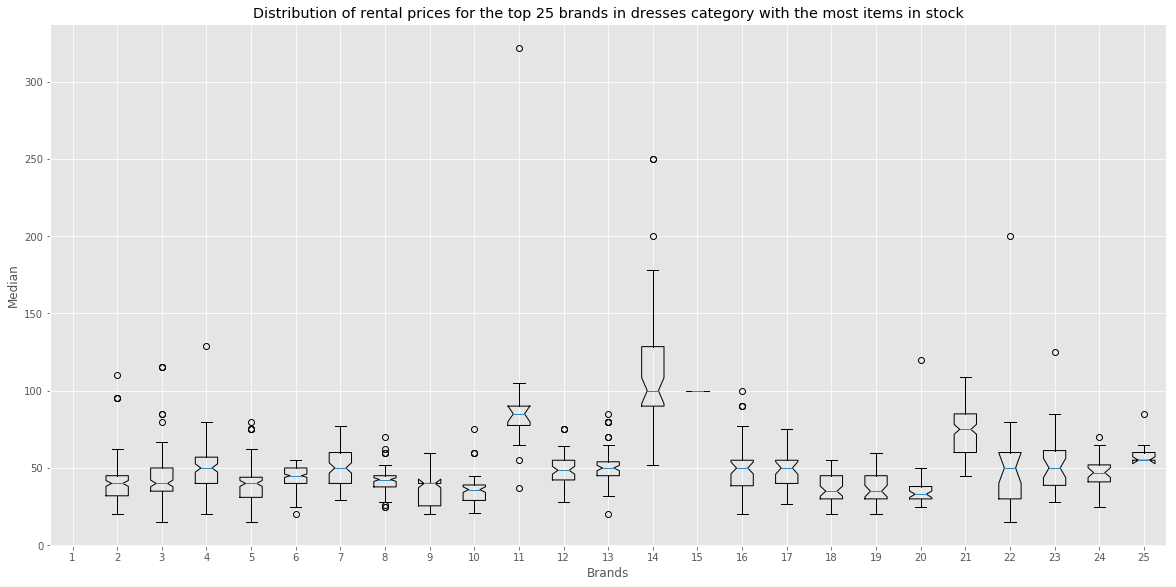

In [118]:
brand_query = "SELECT brand, count(brand) FROM items GROUP BY brand ORDER BY count(brand) DESC;"
brand_df = pd.read_sql_query(brand_query, engine)

def get_attr_by_brand_and_type(brand, item_type, attr):
    return df.loc[(df['brand'] == brand) & (df['item_type'] == item_type)][attr]

l = []
n_start = 0
n_end = 25
for brand in brand_df['brand'][n_start:n_end]:
    rents = get_attr_by_brand_and_type(brand, 'dresses', 'rent_per_week')[df['rent_per_week'] < 10000].astype(int).values
    l.append((brand, rents))
data_arrays = [i[1] for i in l]
labels = [i[0] for i in l]

fig = plt.figure()
fig.suptitle('', fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_title('Distribution of rental prices for the top 25 brands in dresses category with the most items in stock')

ax.set_xlabel('Brands')
ax.set_ylabel('Median')

ax.boxplot(data_arrays, labels)
ax.show()


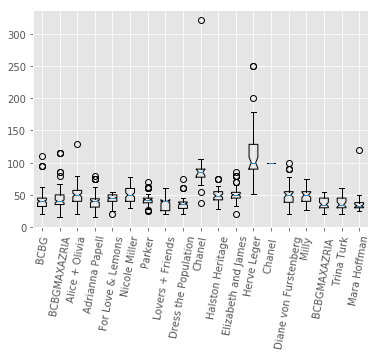

In [53]:
labels

['BCBG', 'BCBGMAXAZRIA', 'Alice + Olivia', 'Adrianna Papell']

In [24]:
brand = "BCBG"
query = """SELECT I.id, I.brand, I.item_type, I.cost, I.sku,
    I.rent_per_week, I.created_at, I.title, I.description,
    I.year_purchased, R.rental_date, R.return_date,
    RI.item_price, RI.refunded, RI.fit_return, RI.created_at
    FROM items I
    LEFT JOIN rental_items RI ON I.id = RI.item_id
    LEFT JOIN rentals R ON R.id = RI.rental_id
    WHERE I.brand = '{}' AND RI.created_at IS NOT NULL;""".format(brand)
rental_df = pd.read_sql_query(query, engine)

def get_attr_by_brand_and_type(brand, item_type, attr):
    return df.loc[(df['brand'] == brand) & (df['item_type'] == item_type)][attr]
rental_df

,id,brand,item_type,cost,sku,rent_per_week,created_at,title,description,year_purchased,rental_date,return_date,item_price,refunded,fit_return,created_at
0,6156,BCBG,dresses,298.0,None,40.0,2016-06-24 16:36:56.370034,Blue Dream,Royal blue mini dress with side cut outs and p...,2015,None,None,30.0,False,False,2016-11-07 19:29:56.164013
1,1206,BCBG,dresses,338.0,N6001017,95.0,2014-12-30 22:52:34.559057,Poppy,"Soft red draped front dress from BCBG, perfect...",None,None,None,85.0,True,True,2016-01-11 16:44:36.730651
2,3244,BCBG,dresses,250.0,None,30.0,2015-11-20 17:37:10.103090,Jolee Spangled One Shoulder Dress,"Simply breathtaking one-shoulder dress, from B...",None,None,None,20.0,False,False,2015-12-29 16:30:50.140633
3,1206,BCBG,dresses,338.0,N6001017,95.0,2014-12-30 22:52:34.559057,Poppy,"Soft red draped front dress from BCBG, perfect...",None,None,None,85.0,False,False,2015-10-07 23:52:26.227727
4,1206,BCBG,dresses,338.0,N6001017,95.0,2014-12-30 22:52:34.559057,Poppy,"Soft red draped front dress from BCBG, perfect...",None,None,None,85.0,False,False,2015-09-29 22:22:17.145495


In [94]:
brand_query = "SELECT brand, count(brand) FROM items GROUP BY brand ORDER BY count(brand) DESC;"
brand_df = pd.read_sql_query(brand_query, engine)

def get_attr_by_brand_and_type(brand, item_type, attr):
    return df.loc[(df['brand'] == brand) & (df['item_type'] == item_type)][attr]

l = []
n_start = 1
n_end = 1500
counter = 0
for brand in brand_df['brand'][n_start:n_end]:
    rents = get_attr_by_brand_and_type(brand, 'dresses', 'rent_per_week')[df['rent_per_week'] < 10000].astype(int).values
    try:
        descr = (np.min(rents), 
             np.percentile(rents, 25), 
             np.median(rents), 
             np.percentile(rents, 75), 
             np.max(rents))
    except ValueError:  #raised if `y` is empty.
        #descr = (0,0,0,0,0)
        pass
        counter += 1
    l.append((brand, descr))

328
1499


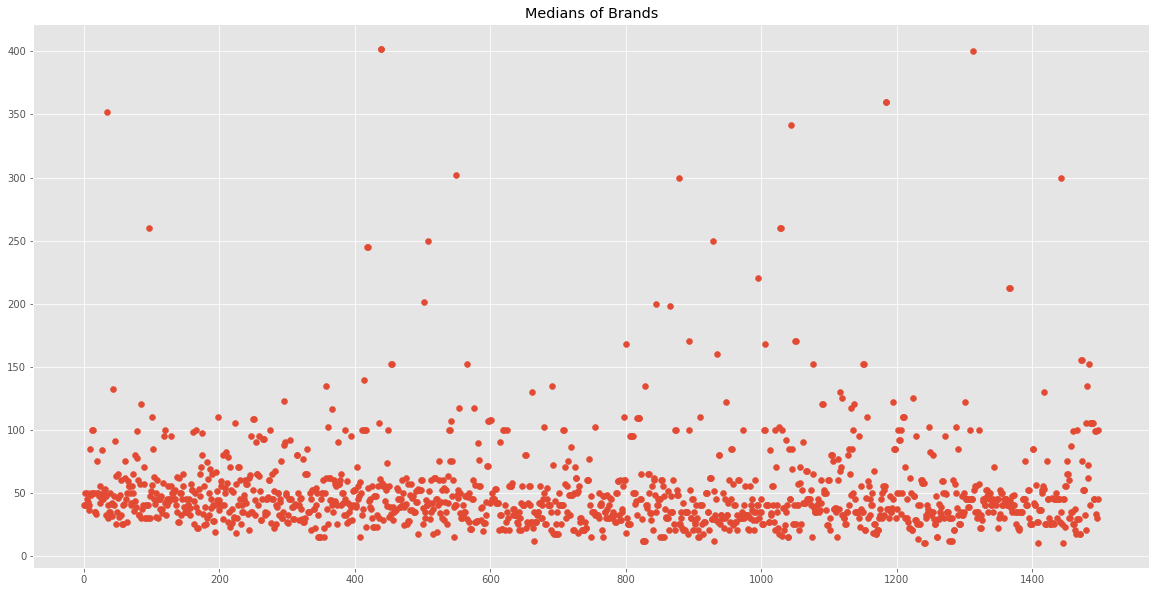

In [98]:
print(counter)
medians = [i[1][2] for i in l] # list of numpy.ndarrays which represetn rental prices for a brand/itemtype 
labels = [i[0] for i in l]
print(len(medians))
plt.scatter(list(range(0, len(medians))),medians)
plt.title('Medians of Brands')
#plt.boxplot(data_arrays, labels)
#plt.xticks(list(range(1, n)), labels, rotation=80)
#plt.show())

In [97]:
import plotly 
plotly.tools.set_credentials_file(username='pspencer', api_key='SO7kJdrJsRV94pdgov52')

In [105]:
brand = 'LENDER SUBMISSION FILL IN'
get_attr_by_brand_and_type('LENDER SUBMISSION FILL IN', 'dresses', 'rent_per_week')

2012    1000000.0
2030    1000000.0
2068    1000000.0
2072    1000000.0
2076    1000000.0
2125    1000000.0
2162    1000000.0
2170    1000000.0
2188    1000000.0
2192    1000000.0
2229    1000000.0
2237    1000000.0
2240    1000000.0
2241    1000000.0
2246    1000000.0
2254    1000000.0
2259    1000000.0
2276    1000000.0
2300    1000000.0
2305    1000000.0
2315    1000000.0
2335    1000000.0
2376    1000000.0
2393    1000000.0
2397    1000000.0
2482    1000000.0
2492    1000000.0
2521    1000000.0
2547    1000000.0
2550    1000000.0
          ...    
6945    1000000.0
6947    1000000.0
6952    1000000.0
6957    1000000.0
6960    1000000.0
7013    1000000.0
7026    1000000.0
7060    1000000.0
7075    1000000.0
7095    1000000.0
7108    1000000.0
7139    1000000.0
7184    1000000.0
7189    1000000.0
7225    1000000.0
7248    1000000.0
7254    1000000.0
7255    1000000.0
7260    1000000.0
7267    1000000.0
7279    1000000.0
7281    1000000.0
7284    1000000.0
7344    1000000.0
7347    10

In [141]:
query = """SELECT I.id, I.brand, I.item_type, I.cost, I.sku,
    I.rent_per_week, I.created_at, I.title, I.description,
    I.year_purchased, R.rental_date, R.return_date,
    RI.item_price, RI.refunded, RI.fit_return
    FROM items I
    LEFT JOIN rental_items RI ON I.id = RI.item_id
    LEFT JOIN rentals R ON R.id = RI.rental_id
    WHERE brand <> 'LENDER SUBMISSION FILL IN';"""
query = """SELECT *
    FROM items I
    WHERE brand <> 'LENDER SUBMISSION FILL IN';"""
df = pd.read_sql_query(query, engine)
pd.set_option('max_colwidth', -1)
df.shape

(6004, 45)